In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from bincounts import *

In [2]:
# Save sample of populations, while keeping total count
path = '/home/zack/stl/scoot/populationsim-master/example_msa_survey/all_outputs'
os.listdir(path)

percent_to_sample = .1
popsim_sample = []
tract_control_totals = []

for foldername in os.listdir(path)[0:1]:
    print(foldername)
    synthetic_p = pd.read_csv(f"{path}/{foldername}/synthetic_persons.csv")
    sample = synthetic_p.sample(int(percent_to_sample*len(synthetic_p)))
    popsim_sample.append(sample)
    
    controls = pd.read_csv(f"{path}/{foldername}/final_TRACT_control_data.csv")
    tract_control_totals.append(controls)

popsim_sample = pd.concat(popsim_sample)
# popsim_sample.drop(columns='Unnamed: 0', inplace=True)
tract_control_totals = pd.concat(tract_control_totals)
popsim_sample.to_csv(f"{path}/../combined_stats/popsim_sample.csv")
tract_control_totals.to_csv(f"{path}/../combined_stats/tract_control_totals.csv")

200_249


### Control Variable Distributions

In [3]:
# Compare the counts of variables in the synthetic population with those in the ACS marginal tables
# Compare full region, as well as a random sample of 10 or so tracts visually
# Each MSA will need to be compared

In [4]:
path = '/home/zack/stl/scoot/populationsim-master/example_msa_survey/all_outputs'
popsim_sample = pd.read_csv(f"{path}/../combined_stats/popsim_sample.csv")
tract_control_totals = pd.read_csv(f"{path}/../combined_stats/tract_control_totals.csv")
geos = pd.read_csv(f"{path}/../../../data/TIGER/msa_puma_tract_join.csv")
labels = pd.read_csv(f"{path}/../configs/controls.csv")

In [9]:
random_tracts = tract_control_totals.sample(5)

tract_geoids = []
var_names = []
synthetic_counts = []
marginal_counts = []

for i, tract in random_tracts.iterrows():
    geoid = int(tract['GEO_ID'][9:])
    persons = popsim_sample.loc[popsim_sample['TRACT']==geoid,]
    for i, control in labels.iloc[1:,].iterrows():
        synth_count = sum(eval(control['expression']))
        marg_count = tract[control['control_field']]
        
        tract_geoids.append(geoid)
        var_names.append(control['control_field'])
        synthetic_counts.append(synth_count*10)
        marginal_counts.append(marg_count)

random_tract_comparisons = pd.DataFrame(zip(tract_geoids, var_names, marginal_counts, synthetic_counts), columns=['tract_geoid','var_name','marginal_count','synthetic_count'])

In [10]:
random_tract_comparisons

,tract_geoid,var_name,marginal_count,synthetic_count
0,26161415600,age0-19,977,850
1,26161415600,age20-24,138,180
2,26161415600,age25-44,481,420
3,26161415600,age45-54,434,500
4,26161415600,age55-59,142,210
...,...,...,...,...
100,36055012401,idincome15000-24999,384,380
101,36055012401,idincome25000-34999,213,280
102,36055012401,idincome35000-49999,253,260
103,36055012401,idincome50000-74999,426,680


In [12]:
popsim_sample

,Unnamed: 0,MSA,TRACT,index,household_id,user,age,gender,race,hispanic,...,student,work,zipcode,hhsize,child,hhincome,idincome,disable,veh,bike
0,5819895,24260,31121966600,46630,5819896,doHe7GcJGAU1iZ2ounWR,24,M,1,Y,...,F,1,80930,4,1,6,6,yes,2,yes
1,4072861,15380,36029014209,75303,4072862,IjmLUgiICuQP1R1p2AjI,39,M,1,N,...,N,7,96007,1,0,1,1,no,1,no
2,1841383,10900,42077006500,57050,1841384,9jO0MmpDVSJgdWzjxskt,56,F,1,N,...,N,1,48723,2,0,6,6,no,2,yes
3,12323519,33460,27123042101,17206,12323520,Q0wHzKcJJAFcHs4Lm5TF,59,F,4,N,...,N,2,22039,2,0,10,2,no,2,no
4,13867063,40380,36055011800,72694,13867064,zFMMQ4gbw5R6wzKJmRUV,26,F,1,N,...,N,1,23606,2,0,4,4,no,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549983,4532081,20260,27017070300,18802,4532082,n5eOK2EFW1k35KiJZ0Ul,56,M,1,N,...,N,1,65745,1,0,4,4,no,1,yes
1549984,13614947,40380,36055003400,70983,13614948,11pBLvD73W4WF431TrKu,28,M,1,N,...,N,1,73160,5,1,8,8,no,2,yes
1549985,5902117,25620,28035000200,30295,5902118,4jPCuqUQRix8HyYa1SyK,31,M,1,N,...,N,1,95682,3,1,5,5,no,1,yes
1549986,12425137,33460,27139080903,17246,12425138,qvrKOC58uXHPBaZicx3Y,19,M,1,N,...,N,1,2817,2,0,7,7,no,3,yes


NameError: name 'pums_sample_p' is not defined

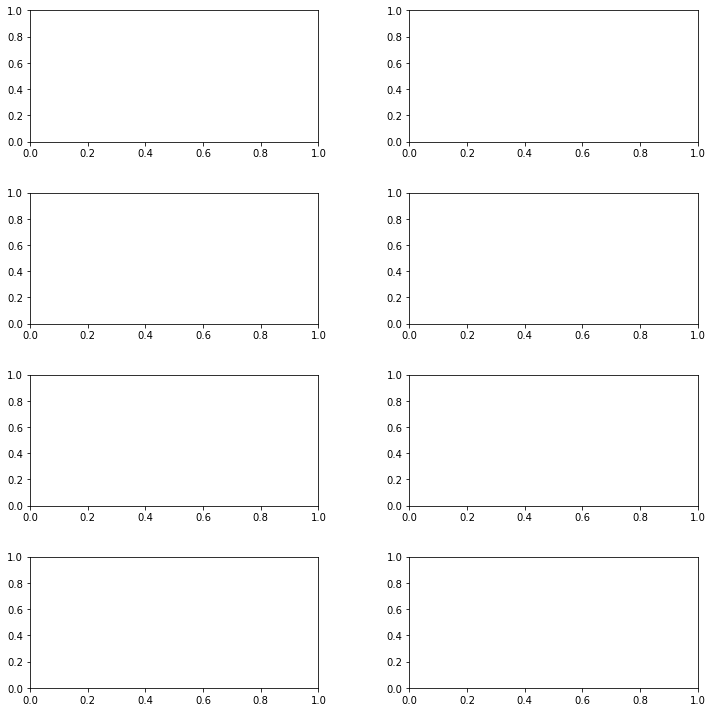

In [11]:
# Generate Barplot Distributions
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
fig.tight_layout(h_pad=3, w_pad=6)

var_list = ['Income','Age','Sex','Education']

for i,var in enumerate(var_list):
    # Handle household-level variables
    # if var in ['NP','VEH']:
    #     pums_counts = list(get_bin_counts(pums_sample_h[var],bin_list[i])/sum(get_bin_counts(pums_sample_h[var],bin_list[i])))
    #     popsim_counts = list(get_bin_counts(popsim_sample_h[var],bin_list[i])/sum(get_bin_counts(popsim_sample_h[var],bin_list[i])))

    # Handle tables where ACS tabulates NAs different than PUMS
    if var =='SCHL':
        over_24_pums_sample = pums_sample_p[pums_sample_p['AGEP']>=25]
        pums_counts = list(get_bin_counts(over_24_pums_sample[var],bin_list[i])/sum(get_bin_counts(over_24_pums_sample[var],bin_list[i])))
        over_24_popsim_sample = popsim_sample_p[popsim_sample_p['AGEP']>=25] # Change to this after fixing SCHL >24 input controls
        over_24_popsim_sample = popsim_sample_p
        popsim_counts = list(get_bin_counts(over_24_popsim_sample[var],bin_list[i])/sum(get_bin_counts(over_24_popsim_sample[var],bin_list[i])))
        
    # Otherwise handle plain person-level variables
    else:
        pums_counts = list(get_bin_counts(pums_sample_p[var],bin_list[i])/sum(get_bin_counts(pums_sample_p[var],bin_list[i])))
        popsim_counts = list(get_bin_counts(popsim_sample_p[var],bin_list[i])/sum(get_bin_counts(popsim_sample_p[var],bin_list[i])))

    # Bring together bin counts to make barplot
    sampled_counts = pd.DataFrame()
    sampled_counts['density'] = popsim_counts + pums_counts
    sampled_counts['Source'] = ['Popsim' for i in range(1,len(bin_list[i]))] + ['Pums' for i in range(1,len(bin_list[i]))]
    sampled_counts['Group'] = bin_names_list[i]*2
    sns.barplot(x="density", y="Group", hue="Source", data=sampled_counts, ax=axes.flatten()[i], orient='h')
    axes.flatten()[i].set_title(var_names_list[i])
    axes.flatten()[i].set_xlabel(None)
    axes.flatten()[i].set_ylabel(None)

In [ ]:
fig

In [ ]:
fig.savefig('control_distributions.png', dpi=300)